In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('Sales_Analysis.csv')
data.head(5)

,Date,Time,State,Group,Unit,Sales
0,01-Oct-20,Morning,WA,Kids,8,20000
1,01-Oct-20,Morning,WA,Men,8,20000
2,01-Oct-20,Morning,WA,Women,4,10000
3,01-Oct-20,Morning,WA,Seniors,15,37500
4,01-Oct-20,Afternoon,WA,Kids,3,7500


In [3]:
data.info

<bound method DataFrame.info of            Date        Time State     Group  Unit  Sales
0     01-Oct-20     Morning    WA      Kids     8  20000
1     01-Oct-20     Morning    WA       Men     8  20000
2     01-Oct-20     Morning    WA     Women     4  10000
3     01-Oct-20     Morning    WA   Seniors    15  37500
4     01-Oct-20   Afternoon    WA      Kids     3   7500
...         ...         ...   ...       ...   ...    ...
7555  30-Dec-20   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-20     Evening   TAS      Kids    15  37500
7557  30-Dec-20     Evening   TAS       Men    15  37500
7558  30-Dec-20     Evening   TAS     Women    11  27500
7559  30-Dec-20     Evening   TAS   Seniors    13  32500

[7560 rows x 6 columns]>

In [4]:
data.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [5]:
# Check for missing values
missing_values = data.isna()
print("Missing Values:")
print(missing_values)

Missing Values:
       Date   Time  State  Group   Unit  Sales
0     False  False  False  False  False  False
1     False  False  False  False  False  False
2     False  False  False  False  False  False
3     False  False  False  False  False  False
4     False  False  False  False  False  False
...     ...    ...    ...    ...    ...    ...
7555  False  False  False  False  False  False
7556  False  False  False  False  False  False
7557  False  False  False  False  False  False
7558  False  False  False  False  False  False
7559  False  False  False  False  False  False

[7560 rows x 6 columns]


In [6]:
data.isna()

,Date,Time,State,Group,Unit,Sales
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
7555,False,False,False,False,False,False
7556,False,False,False,False,False,False
7557,False,False,False,False,False,False
7558,False,False,False,False,False,False


In [7]:
data.isnull()

,Date,Time,State,Group,Unit,Sales
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
7555,False,False,False,False,False,False
7556,False,False,False,False,False,False
7557,False,False,False,False,False,False
7558,False,False,False,False,False,False


●	Select an appropriate Data Wrangling approach —  data standardization or data normalization. Perform the standardization or normalization and present the data.(Normalization is the preferred approach for this problem

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
columns_to_normalize = ['Unit', 'Sales']


In [10]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()
# Apply normalization to the selected columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])


In [11]:
data.head()

,Date,Time,State,Group,Unit,Sales
0,01-Oct-20,Morning,WA,Kids,0.095238,0.095238
1,01-Oct-20,Morning,WA,Men,0.095238,0.095238
2,01-Oct-20,Morning,WA,Women,0.031746,0.031746
3,01-Oct-20,Morning,WA,Seniors,0.206349,0.206349
4,01-Oct-20,Afternoon,WA,Kids,0.015873,0.015873


In [12]:
# Perform one-hot encoding on categorical columns
encoded_data = pd.get_dummies(data, columns=['Date', 'Time', 'State'])

In [13]:
print(encoded_data)

         Group      Unit     Sales  Date_01-Dec-20  Date_01-Nov-20  \
0         Kids  0.095238  0.095238               0               0   
1          Men  0.095238  0.095238               0               0   
2        Women  0.031746  0.031746               0               0   
3      Seniors  0.206349  0.206349               0               0   
4         Kids  0.015873  0.015873               0               0   
...        ...       ...       ...             ...             ...   
7555   Seniors  0.190476  0.190476               0               0   
7556      Kids  0.206349  0.206349               0               0   
7557       Men  0.206349  0.206349               0               0   
7558     Women  0.142857  0.142857               0               0   
7559   Seniors  0.174603  0.174603               0               0   

      Date_01-Oct-20  Date_02-Dec-20  Date_02-Nov-20  Date_02-Oct-20  \
0                  1               0               0               0   
1              

In [14]:
# Concatenate the original data with the encoded data
concatenated_data = pd.concat([data, encoded_data], axis=1)
concatenated_data.head()

,Date,Time,State,Group,Unit,Sales,Group,Unit,Sales,Date_01-Dec-20,...,Time_ Afternoon,Time_ Evening,Time_ Morning,State_ NSW,State_ NT,State_ QLD,State_ SA,State_ TAS,State_ VIC,State_ WA
0,01-Oct-20,Morning,WA,Kids,0.095238,0.095238,Kids,0.095238,0.095238,0,...,0,0,1,0,0,0,0,0,0,1
1,01-Oct-20,Morning,WA,Men,0.095238,0.095238,Men,0.095238,0.095238,0,...,0,0,1,0,0,0,0,0,0,1
2,01-Oct-20,Morning,WA,Women,0.031746,0.031746,Women,0.031746,0.031746,0,...,0,0,1,0,0,0,0,0,0,1
3,01-Oct-20,Morning,WA,Seniors,0.206349,0.206349,Seniors,0.206349,0.206349,0,...,0,0,1,0,0,0,0,0,0,1
4,01-Oct-20,Afternoon,WA,Kids,0.015873,0.015873,Kids,0.015873,0.015873,0,...,1,0,0,0,0,0,0,0,0,1


In [15]:
# Perform label encoding on the 'Time' and 'Group' columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
concatenated_data['Time'] = label_encoder.fit_transform(concatenated_data['Time'])


In [16]:
concatenated_data.head()

,Date,Time,State,Group,Unit,Sales,Group,Unit,Sales,Date_01-Dec-20,...,Time_ Afternoon,Time_ Evening,Time_ Morning,State_ NSW,State_ NT,State_ QLD,State_ SA,State_ TAS,State_ VIC,State_ WA
0,01-Oct-20,2,WA,Kids,0.095238,0.095238,Kids,0.095238,0.095238,0,...,0,0,1,0,0,0,0,0,0,1
1,01-Oct-20,2,WA,Men,0.095238,0.095238,Men,0.095238,0.095238,0,...,0,0,1,0,0,0,0,0,0,1
2,01-Oct-20,2,WA,Women,0.031746,0.031746,Women,0.031746,0.031746,0,...,0,0,1,0,0,0,0,0,0,1
3,01-Oct-20,2,WA,Seniors,0.206349,0.206349,Seniors,0.206349,0.206349,0,...,0,0,1,0,0,0,0,0,0,1
4,01-Oct-20,0,WA,Kids,0.015873,0.015873,Kids,0.015873,0.015873,0,...,1,0,0,0,0,0,0,0,0,1


In [17]:
# Group data by 'Group' column and calculate mean, sum, count, min, and max of 'Sales' and 'Unit' columns
grouped_data = data.groupby('Group').agg({
    'Sales': ['mean', 'sum', 'count', 'min', 'max'],
    'Unit': ['mean', 'sum', 'count', 'min', 'max']
})

In [18]:
grouped_data

Sales                                       Unit              \
              mean         sum count  min       max      mean         sum   
Group                                                                       
 Kids     0.254044  480.142857  1890  0.0  1.000000  0.254044  480.142857   
 Men      0.256320  484.444444  1890  0.0  0.984127  0.256320  484.444444   
 Seniors  0.250567  473.571429  1890  0.0  1.000000  0.250567  473.571429   
 Women    0.255287  482.492063  1890  0.0  1.000000  0.255287  482.492063   

                               
         count  min       max  
Group                          
 Kids     1890  0.0  1.000000  
 Men      1890  0.0  0.984127  
 Seniors  1890  0.0  1.000000  
 Women    1890  0.0  1.000000

In [19]:
# Group data by 'Group' column and analyze the statistics within each group
grouped_data = data.groupby('Group')

# Calculate the average 'Sales' within each group
average_sales = grouped_data['Sales'].mean()
print("Average Sales by Group:")
print(average_sales)

# Calculate the total 'Sales' within each group
total_sales = grouped_data['Sales'].sum()
print("\nTotal Sales by Group:")
print(total_sales)

# Calculate the maximum 'Sales' within each group
max_sales = grouped_data['Sales'].max()
print("\nMaximum Sales by Group:")
print(max_sales)

# Calculate the minimum 'Sales' within each group
min_sales = grouped_data['Sales'].min()
print("\nMinimum Sales by Group:")

Average Sales by Group:
Group
 Kids       0.254044
 Men        0.256320
 Seniors    0.250567
 Women      0.255287
Name: Sales, dtype: float64

Total Sales by Group:
Group
 Kids       480.142857
 Men        484.444444
 Seniors    473.571429
 Women      482.492063
Name: Sales, dtype: float64

Maximum Sales by Group:
Group
 Kids       1.000000
 Men        0.984127
 Seniors    1.000000
 Women      1.000000
Name: Sales, dtype: float64

Minimum Sales by Group:


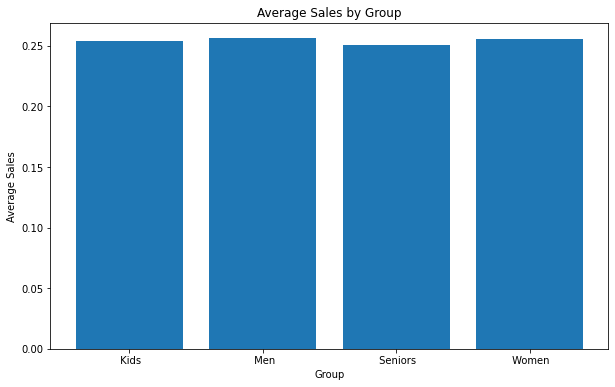

In [20]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the average sales
ax.bar(average_sales.index, average_sales)

# Set labels and title
ax.set_xlabel('Group')
ax.set_ylabel('Average Sales')
ax.set_title('Average Sales by Group')

# Show the plot
plt.show()

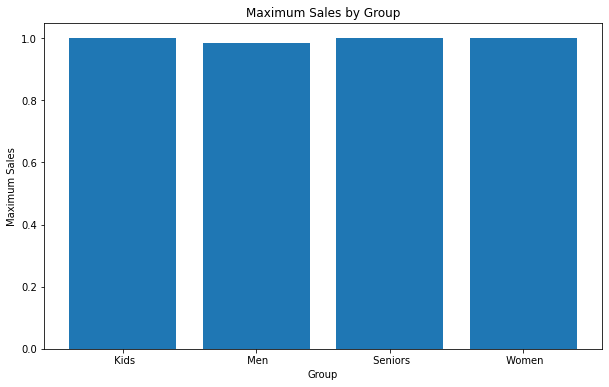

In [21]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the maximum sales
ax.bar(max_sales.index, max_sales)

# Set labels and title
ax.set_xlabel('Group')
ax.set_ylabel('Maximum Sales')
ax.set_title('Maximum Sales by Group')

# Show the plot
plt.show()

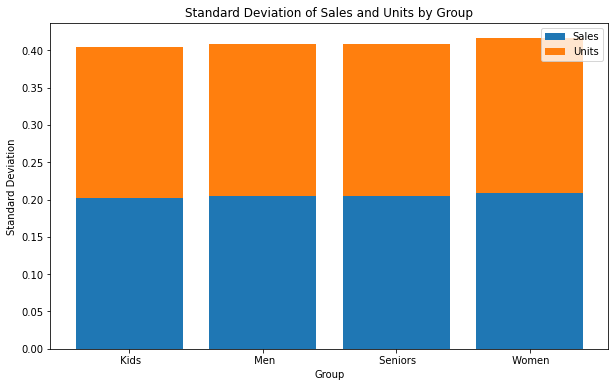

In [22]:
# Calculate the standard deviation of sales and units by group
std_sales = data.groupby('Group')['Sales'].std()
std_units = data.groupby('Group')['Unit'].std()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Set the index for the x-axis positions
index = std_sales.index

# Plot the standard deviation of sales
ax.bar(index, std_sales, label='Sales')

# Plot the standard deviation of units on top of sales
ax.bar(index, std_units, bottom=std_sales, label='Units')

# Set labels and title
ax.set_xlabel('Group')
ax.set_ylabel('Standard Deviation')
ax.set_title('Standard Deviation of Sales and Units by Group')

# Add legend
ax.legend()

# Show the plot
plt.show()


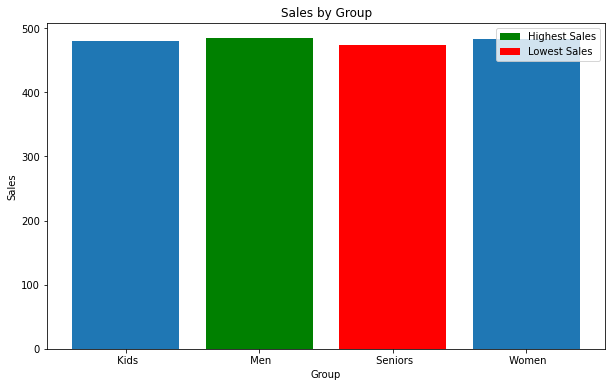

In [23]:
# Calculate the total sales by group
sales_by_group = data.groupby('Group')['Sales'].sum()

# Find the group with the highest and lowest sales
highest_sales_group = sales_by_group.idxmax()
lowest_sales_group = sales_by_group.idxmin()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the sales by group
ax.bar(sales_by_group.index, sales_by_group)

# Highlight the group with the highest sales
ax.bar(highest_sales_group, sales_by_group[highest_sales_group], color='green', label='Highest Sales')

# Highlight the group with the lowest sales
ax.bar(lowest_sales_group, sales_by_group[lowest_sales_group], color='red', label='Lowest Sales')

# Set labels and title
ax.set_xlabel('Group')
ax.set_ylabel('Sales')
ax.set_title('Sales by Group')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [24]:
# Calculate the total sales by state and group
sales_by_state_group = data.groupby(['State', 'Group'])['Sales'].sum()


In [25]:
# Reshape the data to have states as columns and groups as rows
sales_pivot = sales_by_state_group.unstack()

# Print the sales analysis by state and group
print("State-wise Sales Analysis by Group:")
print(sales_pivot)

State-wise Sales Analysis by Group:
Group        Kids         Men     Seniors       Women
State                                                
 NSW   109.444444  112.206349  106.904762  113.158730
 NT     27.619048   28.015873   26.126984   27.317460
 QLD    45.460317   44.714286   43.428571   44.285714
 SA     83.587302   84.476190   84.873016   86.476190
 TAS    28.095238   27.984127   27.301587   26.841270
 VIC   158.793651  159.095238  158.507937  159.571429
 WA     27.142857   27.952381   26.428571   24.841270


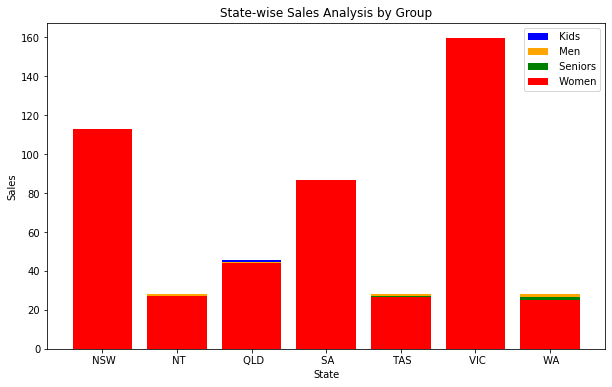

In [26]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Define the number of groups and their colors
num_groups = len(sales_pivot.columns)
colors = ['blue', 'orange', 'green', 'red']

# Plot the sales for each state and group
for i, group in enumerate(sales_pivot.columns):
    ax.bar(sales_pivot.index, sales_pivot[group], label=group, color=colors[i])

# Set labels and title
ax.set_xlabel('State')
ax.set_ylabel('Sales')
ax.set_title('State-wise Sales Analysis by Group')

# Add legend
ax.legend()

# Show the plot
plt.show()

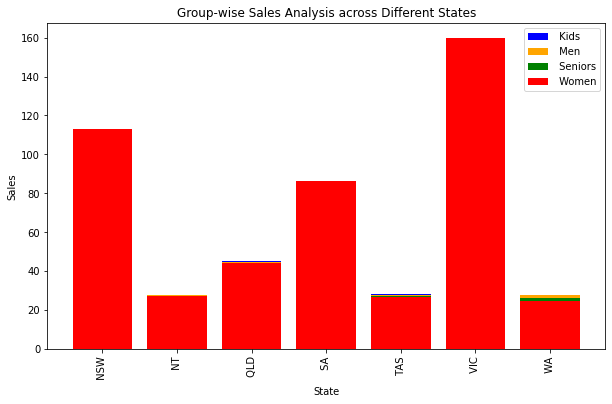

In [28]:
# Calculate the total sales by group and state
sales_by_group_state = data.groupby(['Group', 'State'])['Sales'].sum()

# Reshape the data to have groups as columns and states as rows
sales_pivot = sales_by_group_state.unstack()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Define the number of states and their colors
num_states = len(sales_pivot.columns)
colors = ['blue', 'orange', 'green', 'red']


# Plot the sales for each group and state
for i, group in enumerate(sales_pivot.index):
    ax.bar(sales_pivot.columns, sales_pivot.loc[group], label=group, color=colors[i])

# Set labels and title
ax.set_xlabel('State')
ax.set_ylabel('Sales')
ax.set_title('Group-wise Sales Analysis across Different States')

# Add legend
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

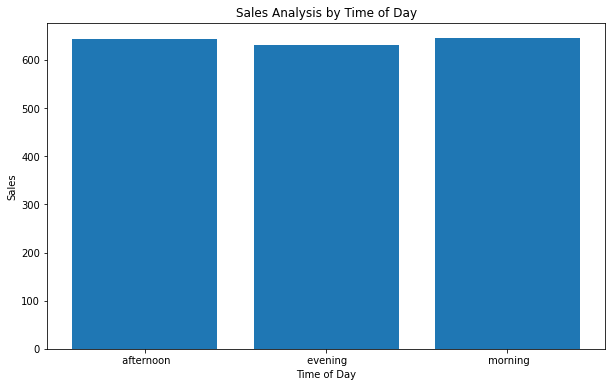

In [29]:
# Convert the 'Time' column to lowercase for consistency
data['Time'] = data['Time'].str.lower()

# Calculate the total sales by time of day
sales_by_time = data.groupby('Time')['Sales'].sum()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the sales by time of day
ax.bar(sales_by_time.index, sales_by_time)

# Set labels and title
ax.set_xlabel('Time of Day')
ax.set_ylabel('Sales')
ax.set_title('Sales Analysis by Time of Day')

# Show the plot
plt.show()

In [30]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

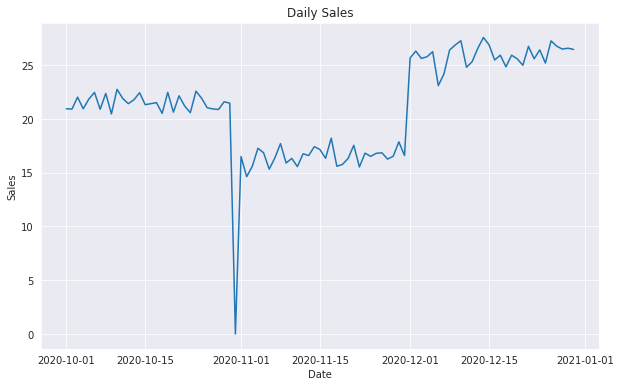

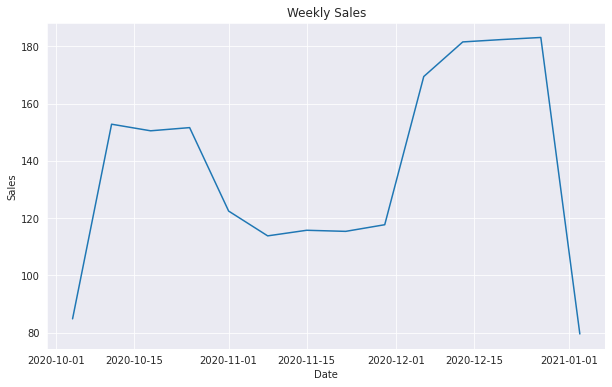

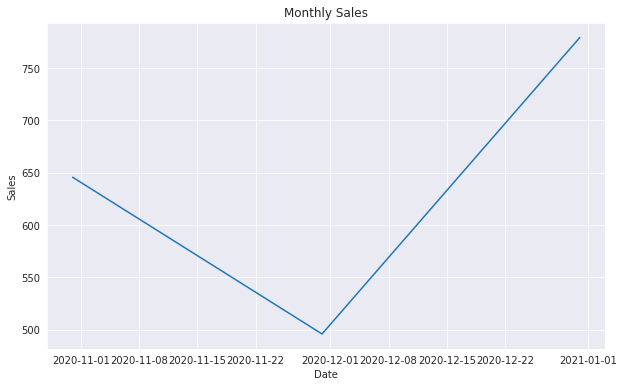

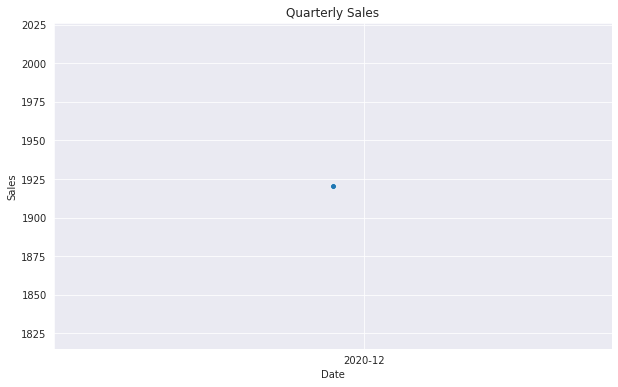

In [34]:
# Resample the data by day and calculate the total sales per day
daily_sales = data['Sales'].resample('D').sum()

# Create a line plot using Seaborn
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_sales)
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

#Create the weekly sales chart:

# Resample the data by week and calculate the total sales per week
weekly_sales = data['Sales'].resample('W').sum()

# Create a line plot using Seaborn
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=weekly_sales)
plt.title('Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

#Create the monthly sales chart:
# Resample the data by month and calculate the total sales per month
monthly_sales = data['Sales'].resample('M').sum()

# Create a line plot using Seaborn
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales)
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


#Create the quarterly sales chart:

# Resample the data by quarter and calculate the total sales per quarter
quarterly_sales = data['Sales'].resample('Q').sum()

# Create a line plot using Seaborn
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=quarterly_sales, marker='o')
plt.title('Quarterly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')

# Adjust x-axis tick positions and labels to the end of each quarter
plt.xticks(quarterly_sales.index + pd.DateOffset(months=3), quarterly_sales.index.strftime('%Y-%m'))

plt.show()